In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ipc_path = "ipc.xlsx" # Modificar a ruta
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "") for c in market]
market

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC*,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA*,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,38.50,225.87,7.16,354.06,105.00,114.88,102.63,18.58,179.27,141.14,...,77.22,101.53,34.88,51.89,69.80,44.23,16.00,25.72,193.51,43657.48
2019-12-31,37.50,224.67,7.08,354.04,105.65,114.88,99.98,18.71,178.67,141.83,...,77.44,100.86,34.43,51.86,69.82,44.37,15.68,25.83,193.54,43541.02
2020-01-01,37.50,224.67,7.08,354.04,105.65,114.88,99.98,18.71,178.67,141.83,...,77.44,100.86,34.43,51.86,69.82,44.37,15.68,25.83,193.54,43541.02


In [4]:
Rmkt = market.diff().dropna()
Xall = Rmkt.drop("MEXBOL", axis=1)
Xall = Xall.join(Rmkt["MEXBOL"].shift(-1)).dropna()

Xtrain = Xall.drop("MEXBOL", axis=1)
ytrain = Xall["MEXBOL"]

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from numpy.random import uniform
from sklearn.model_selection import train_test_split

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=1643)

In [7]:
alpha_list = uniform(0.1, 1, 300)

In [8]:
# para usar dentro de GridSearchCV
params = {
    "model__alpha": alpha_list
}

pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", Lasso())
])

# paso 2: Inicializando el modelo
gcv = GridSearchCV(pipe, params, scoring="r2")
# paso 3: "entrenar" el modelo
gcv.fit(Xtrain, ytrain)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3773828.3663689923, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4364592.473196758, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1471469.435361547, tolerance: 4654.949912525844
  positive)
C:\

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2144168.1344568655, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1964591.2395142526, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2407216.438185822, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1842931.618619821, tolerance: 4654.949912525844
  

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2143896.311716075, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1991702.9548249068, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2489408.053877915, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1936162.1244754237, tolerance: 4654.949912525844
  

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2681495.6931128893, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708614.516234019, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3200974.8975225436, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2523536.7388303564, tolerance: 4654.949912525844
 

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2265738.058063433, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3979900.260354683, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4486552.530895207, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2365047.7735758102, tolerance: 4654.949912525844
  p

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1888800.8379922744, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2850901.3131290367, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3377577.013434601, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2628898.6657584384, tolerance: 4654.949912525844
 

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1946572.4530391009, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2511312.724754316, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3031741.161330496, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2306049.7718659774, tolerance: 4654.949912525844
  

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2447230.814682322, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4125518.666822888, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4228781.2672104165, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2665028.5999328764, tolerance: 4654.949912525844
  

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1804006.3117277494, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4109636.1407130985, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4313226.886377878, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2629097.996146751, tolerance: 4654.949912525844
  

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2625134.974542613, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2305407.57051221, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2738221.309551634, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2155963.9673609026, tolerance: 4654.949912525844
  po

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1764946.3832434583, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1908650.2695041648, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2356928.2141103945, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1781764.7230256954, tolerance: 4654.949912525844


C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951975.691707629, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2154852.804576628, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2578804.564531411, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012692.082002889, tolerance: 4654.949912525844
  po

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2206420.0293571423, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2647394.8947506845, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2075148.154010586, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2860222.7901947144, tolerance: 6369.861119113112
 

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1820933.579519559, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2250210.7450140854, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1688026.816281756, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3322364.3453011424, tolerance: 6369.861119113112
  

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1924147.0838739418, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2350808.905645846, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1799974.59555399, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1946734.172707881, tolerance: 6369.861119113112
  po

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4123270.9501045384, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4228212.866723949, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2663071.896267524, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1911331.750511867, tolerance: 6369.861119113112
  p

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2831953.8807500964, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3358946.518118473, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2605544.418139369, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3837343.0760177206, tolerance: 6369.861119113112
  

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4097772.121036009, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4322830.102064073, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2598891.8587366934, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3755643.21453928, tolerance: 6369.861119113112
  po

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3261700.0201851716, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3788012.6848537587, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2619408.4234849736, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3319265.32912868, tolerance: 6369.861119113112
  

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3774446.479637025, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4327034.817464361, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1753086.5377187855, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3259686.161024116, tolerance: 6369.861119113112
  p

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3945530.417616038, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4444849.791058743, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1872820.1126365392, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2544878.3877308313, tolerance: 6369.861119113112
  

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3499561.5181426704, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4106872.265362176, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2302472.976107275, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2875539.087177628, tolerance: 6369.861119113112
  p

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2658575.2751127062, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3140606.665629481, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2455978.2324367445, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3125268.2251204364, tolerance: 6369.861119113112
 

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4091563.3861932526, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4334820.696692194, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2586083.2623716267, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3247993.8516251193, tolerance: 6369.861119113112
 

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3817537.5188205997, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4367900.416527208, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1388638.6404314814, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2662099.9401949784, tolerance: 6369.861119113112
 

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4108343.4261013623, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4357602.579251859, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2622014.5084491046, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2693465.20969403, tolerance: 6369.861119113112
  p

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3948250.8336961586, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2358346.8014789224, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3661616.9496320207, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4134416.245497899, tolerance: 6242.774867352834
 

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3654421.297522478, tolerance: 6242.774867352834
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2780566.8440861814, tolerance: 4654.949912525844
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3291721.811890008, tolerance: 6369.861119113112
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3929858.041816773, tolerance: 6242.774867352834
  p

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              w...
       0.9

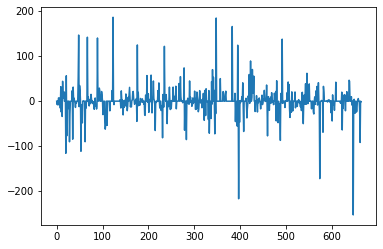

In [9]:
co = gcv.best_estimator_.named_steps["model"].coef_
plt.plot(co)

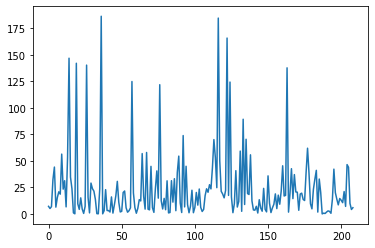

In [26]:
coeficientes = [element for element in co if element > 0.01]
plt.plot(coeficientes)

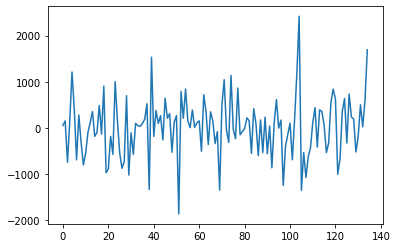

In [10]:
yhat=gcv.predict(Xtest)
plt.plot(yhat)

Demostración: 
Sea $\sigma(x)= \frac{1}{1+exp(-x)}$, por demostrar $\frac{d}{dx}\sigma(x)= \sigma(x)(1-\sigma(x)).$

$ \frac{d}{dx}\sigma(x)=\frac{d}{dx} \frac{1}{1+exp(-x)}$

$= \frac{d}{dx}(1+exp(-x))^{-1} = -[1+exp(-x)]^{-2} \cdot (-exp(-x)) = -(1+exp(-x))^{-2} (-exp(-x))$

$ = \frac{exp(-x)}{(1+exp(-x))^{2}} = \frac{1}{1+exp(-x)} (\frac{exp(-x)}{1+exp(-x)}) $ 

$=\frac{1}{1+exp(-x)} [(\frac{1+exp(-x)}{1+exp(-x)})- (\frac{1}{1+exp(-x)})]  $ 

$= \frac{1}{1+exp(-x)} (1-\frac{1}{1+exp(-x)})$

$ =\sigma(x)(1-\sigma(x)) $